# Projets de Clustering 

## les imports

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Chargement des données et préparation

In [5]:
df = pd.read_csv("Mall_Customers.csv")

In [6]:
df.head()#Verification des colonnes de la base

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Préparation des données
# Sélection des features pertinentes : Annual Income et Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values


In [42]:
df.isnull().sum()#verification du nombre de valeurs manquantes

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# 1. K-means Clustering
def kmeans_clustering(X_scaled, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    return kmeans_labels, kmeans

In [69]:
# Déterminer le nombre optimal de clusters avec la méthode du coude
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

## Methode du coude

Text(0.5, 1.0, 'Méthode du coude pour K-means')

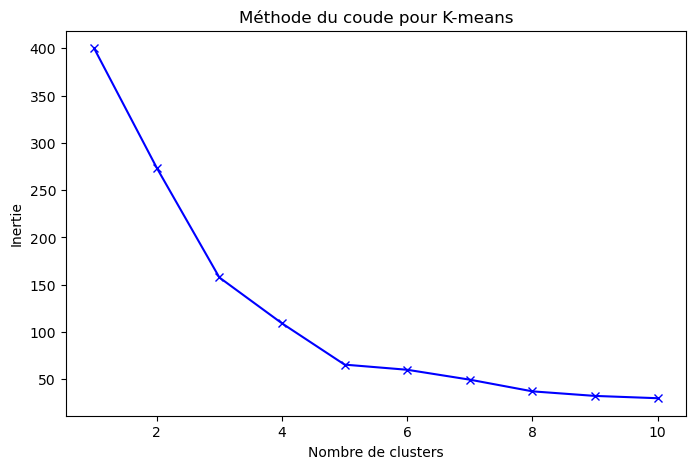

In [15]:
# Visualisation de la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour K-means')
#plt.savefig('elbow_method.png')#création de l'image
#plt.close()

In [70]:
# Appliquer K-means avec 5 clusters (par exemple)
kmeans_labels, kmeans_model = kmeans_clustering(X_scaled, n_clusters=5)

## Dendogramme (CAH)

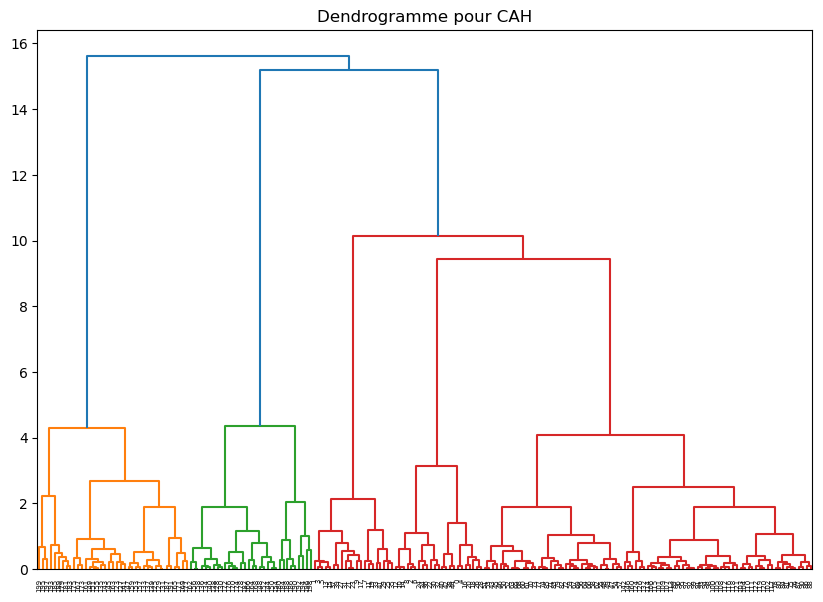

In [17]:
# 2. Clustering Hiérarchique (CAH)
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogramme pour CAH')
plt.savefig('dendrogram.png')

In [18]:
# Couper le dendrogramme pour obtenir 5 clusters
cah_labels = fcluster(Z, t=5, criterion='maxclust')

## DBSCAN

In [19]:
# 3. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [20]:
# Réduction de dimension pour visualisation (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [21]:
# Visualisation des résultats
def plot_clusters(X_pca, labels, title, filename):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='deep', s=100)
    plt.title(title)
    plt.xlabel('Composante Principale 1')
    plt.ylabel('Composante Principale 2')
    plt.savefig(filename)

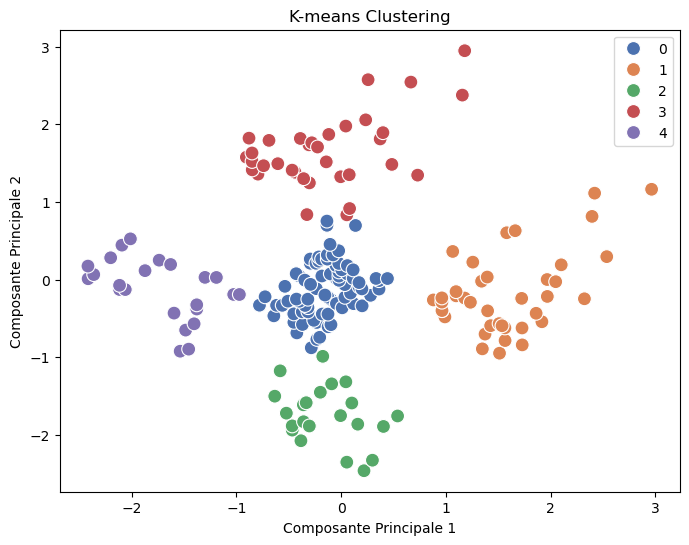

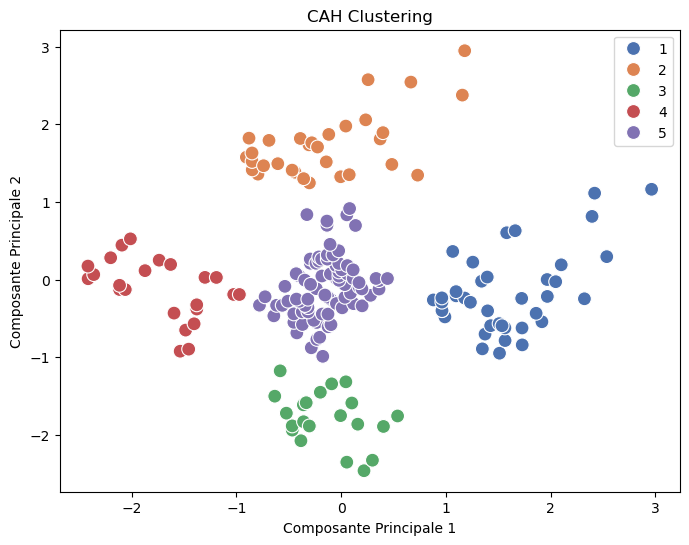

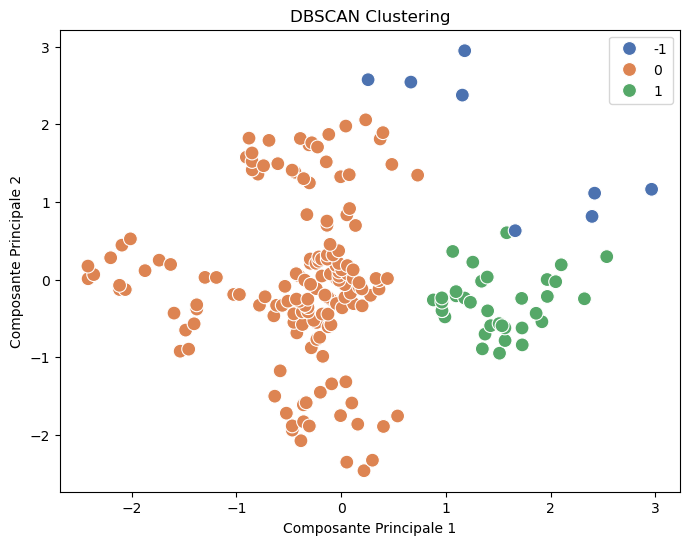

In [22]:
# Visualisations pour chaque algorithme
plot_clusters(X_pca, kmeans_labels, 'K-means Clustering', 'kmeans_clusters.png')
plot_clusters(X_pca, cah_labels, 'CAH Clustering', 'cah_clusters.png')
plot_clusters(X_pca, dbscan_labels, 'DBSCAN Clustering', 'dbscan_clusters.png')

## Sauvegarde des données dans un fichier CSV Result

In [23]:
# Sauvegarde des résultats
results = pd.DataFrame({
    'Annual Income (k$)': df['Annual Income (k$)'],
    'Spending Score': df['Spending Score (1-100)'],
    'Kmeans_Cluster': kmeans_labels,
    'CAH_Cluster': cah_labels,
    'DBSCAN_Cluster': dbscan_labels
})
results.to_csv('customer_segmentation_results.csv', index=False)

print("Segmentation terminée. Résultats sauvegardés dans 'customer_segmentation_results.csv'.")
print("Visualisations sauvegardées : elbow_method.png, dendrogram.png, kmeans_clusters.png, cah_clusters.png, dbscan_clusters.png")

Segmentation terminée. Résultats sauvegardés dans 'customer_segmentation_results.csv'.
Visualisations sauvegardées : elbow_method.png, dendrogram.png, kmeans_clusters.png, cah_clusters.png, dbscan_clusters.png


In [25]:
print("Silhouette K-means:", silhouette_score(X_scaled, kmeans_labels))
print("Silhouette CAH:", silhouette_score(X_scaled, cah_labels))

Silhouette K-means: 0.5546571631111091
Silhouette CAH: 0.5538089226688662


In [26]:
results = pd.read_csv('customer_segmentation_results.csv')
kmeans_summary = results.groupby('Kmeans_Cluster').mean()
print(kmeans_summary)

                Annual Income (k$)  Spending Score  CAH_Cluster  \
Kmeans_Cluster                                                    
0                        55.296296       49.518519     5.000000   
1                        86.538462       82.128205     1.000000   
2                        25.727273       79.363636     3.090909   
3                        88.200000       17.114286     2.257143   
4                        26.304348       20.913043     4.000000   

                DBSCAN_Cluster  
Kmeans_Cluster                  
0                     0.000000  
1                     0.794872  
2                     0.000000  
3                    -0.114286  
4                     0.000000  


In [71]:
print("Les K-means clusters\n")
for n_clusters in range(3, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Clusters: {n_clusters}, Silhouette Score: {score}")

Les K-means clusters

Clusters: 3, Silhouette Score: 0.46658474419000145
Clusters: 4, Silhouette Score: 0.49434988482196784
Clusters: 5, Silhouette Score: 0.5546571631111091
Clusters: 6, Silhouette Score: 0.5138257534676561
Clusters: 7, Silhouette Score: 0.50200146805547


In [28]:
Z = linkage(X_scaled, method='ward')
cah_labels = fcluster(Z, t=5, criterion='maxclust')
print("Silhouette CAH:", silhouette_score(X_scaled, cah_labels))

Silhouette CAH: 0.5538089226688662


In [38]:
for eps in [0.3, 0.4, 0.5, 0.6]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    if len(set(labels)) > 1:  # Vérifier qu'il y a plus d'un cluster
        print(f"DBSCAN eps={eps}, Silhouette Score:", silhouette_score(X_scaled, labels))

DBSCAN eps=0.3, Silhouette Score: 0.31614121976731185
DBSCAN eps=0.4, Silhouette Score: 0.41325830390002166
DBSCAN eps=0.5, Silhouette Score: 0.35044619989666004
DBSCAN eps=0.6, Silhouette Score: 0.42136463110237615


In [32]:
results = pd.read_csv('customer_segmentation_results.csv')
print(results.columns)

Index(['Annual Income (k$)', 'Spending Score', 'Kmeans_Cluster', 'CAH_Cluster',
       'DBSCAN_Cluster'],
      dtype='object')


In [33]:
kmeans_summary = results.groupby('Kmeans_Cluster')[['Annual Income (k$)', 'Spending Score']].mean()
print(kmeans_summary)

                Annual Income (k$)  Spending Score
Kmeans_Cluster                                    
0                        55.296296       49.518519
1                        86.538462       82.128205
2                        25.727273       79.363636
3                        88.200000       17.114286
4                        26.304348       20.913043


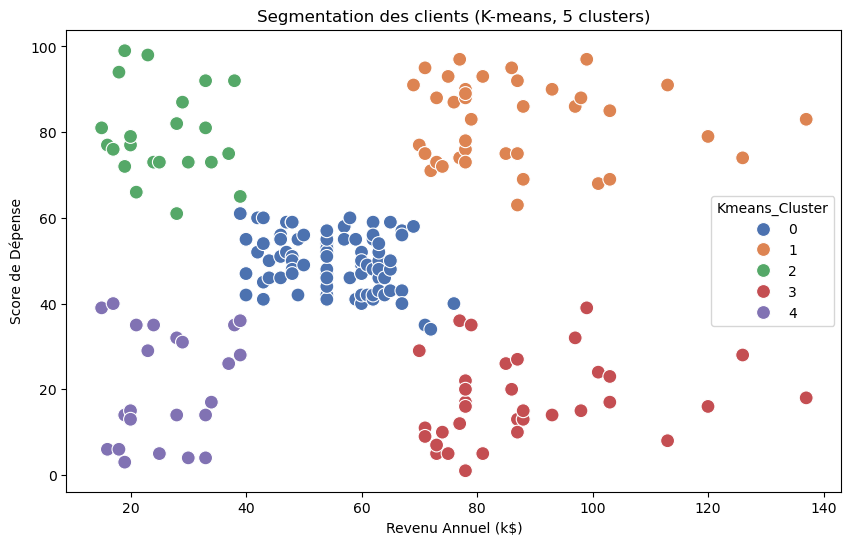

In [34]:
# Charger les données
results = pd.read_csv('customer_segmentation_results.csv')

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results, x='Annual Income (k$)', y='Spending Score', hue='Kmeans_Cluster', palette='deep', s=100)
plt.title('Segmentation des clients (K-means, 5 clusters)')
plt.xlabel('Revenu Annuel (k$)')
plt.ylabel('Score de Dépense')
plt.savefig('kmeans_clusters_final.png')
plt.show()


## Verification dela corrélation avec l'age 

In [44]:
# Ajouter la colonne Age aux résultats
# Supposons que les lignes de df et results sont alignées (même ordre)
results['Age'] = df['Age']

In [45]:
# Analyser la distribution de l'âge par cluster
age_summary = results.groupby('Kmeans_Cluster')['Age'].agg(['mean', 'std', 'count'])
print("\nStatistiques de l'âge par cluster :")
print(age_summary)


Statistiques de l'âge par cluster :
                     mean        std  count
Kmeans_Cluster                             
0               42.716049  16.447822     81
1               32.692308   3.728650     39
2               25.272727   5.257030     22
3               41.114286  11.341676     35
4               45.217391  13.228607     23


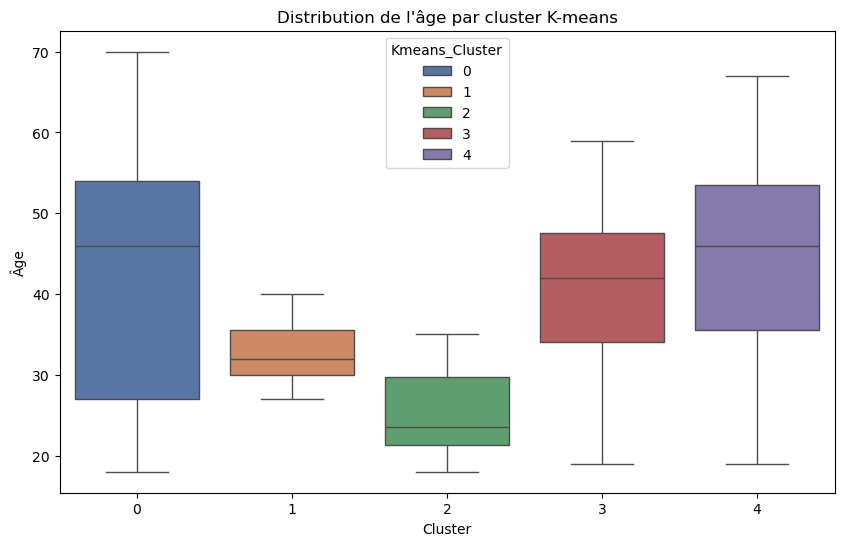

In [49]:
# Visualisation 1 : Boxplot de l'âge par cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kmeans_Cluster', y='Age',hue='Kmeans_Cluster', data=results, palette='deep')
plt.title('Distribution de l\'âge par cluster K-means')
plt.xlabel('Cluster')
plt.ylabel('Âge')
plt.savefig('age_by_cluster_boxplot.png')
#plt.close()

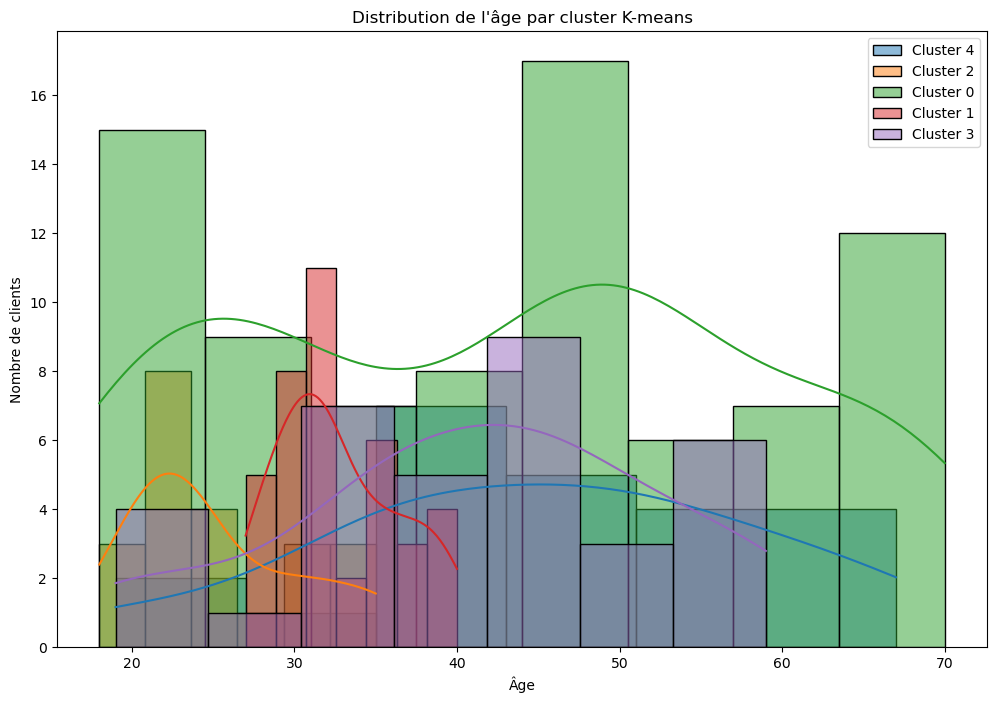

In [51]:
# Visualisation 2 : Histogramme de l'âge par cluster
plt.figure(figsize=(12, 8))
for cluster in results['Kmeans_Cluster'].unique():
    sns.histplot(data=results[results['Kmeans_Cluster'] == cluster], x='Age', label=f'Cluster {cluster}', kde=True, alpha=0.5)
plt.title('Distribution de l\'âge par cluster K-means')
plt.xlabel('Âge')
plt.ylabel('Nombre de clients')
plt.legend()
plt.savefig('age_by_cluster_histogram.png')
#plt.close()

In [52]:
# Inclure Age dans les features
X = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].values
income_col = 'Annual Income (k$)'
spending_col = 'Spending Score (1-100)'
age_col = 'Age'

In [ ]:
# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
# 3. K-means avec 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


In [54]:
# Calculer le score de silhouette
silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"Score de silhouette pour K-means avec Age (5 clusters) : {silhouette}")

Score de silhouette pour K-means avec Age (5 clusters) : 0.5546571631111091


In [55]:
# 4. Sauvegarde des résultats
results = pd.DataFrame({
    income_col: df[income_col],
    spending_col: df[spending_col],
    age_col: df[age_col],
    'Kmeans_Cluster': kmeans_labels
})

In [56]:
results.to_csv('customer_segmentation_with_age.csv', index=False)
print("Résultats sauvegardés dans 'customer_segmentation_with_age.csv'")

Résultats sauvegardés dans 'customer_segmentation_with_age.csv'


In [57]:
# 5. Analyse des clusters
kmeans_summary = results.groupby('Kmeans_Cluster')[[income_col, spending_col, age_col]].mean()
print("\nMoyennes par cluster (avec Age) :")
print(kmeans_summary)


Moyennes par cluster (avec Age) :
                Annual Income (k$)  Spending Score (1-100)        Age
Kmeans_Cluster                                                       
0                        55.296296               49.518519  42.716049
1                        86.538462               82.128205  32.692308
2                        25.727273               79.363636  25.272727
3                        88.200000               17.114286  41.114286
4                        26.304348               20.913043  45.217391


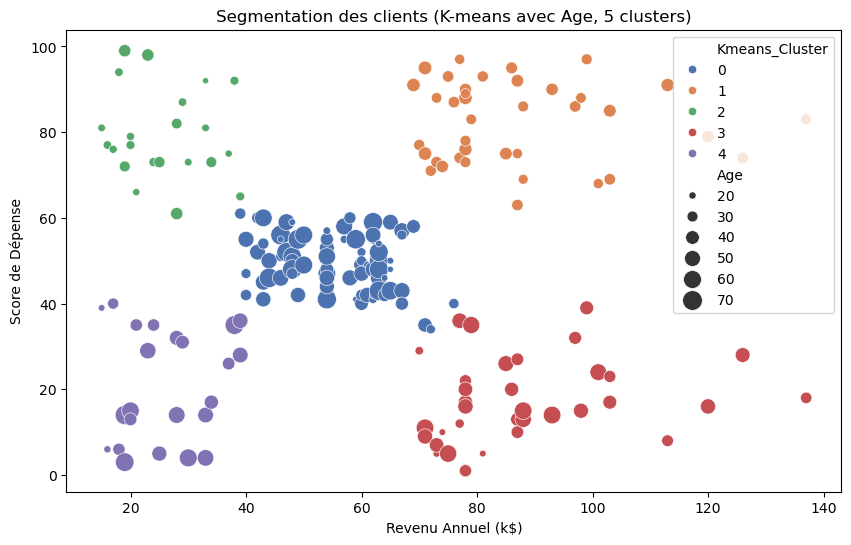

In [58]:
# 6. Visualisation : Scatterplot avec Age en couleur
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results, x=income_col, y=spending_col, hue='Kmeans_Cluster', size='Age', sizes=(20, 200), palette='deep')
plt.title('Segmentation des clients (K-means avec Age, 5 clusters)')
plt.xlabel('Revenu Annuel (k$)')
plt.ylabel('Score de Dépense')
plt.savefig('kmeans_clusters_with_age.png')
#plt.close()

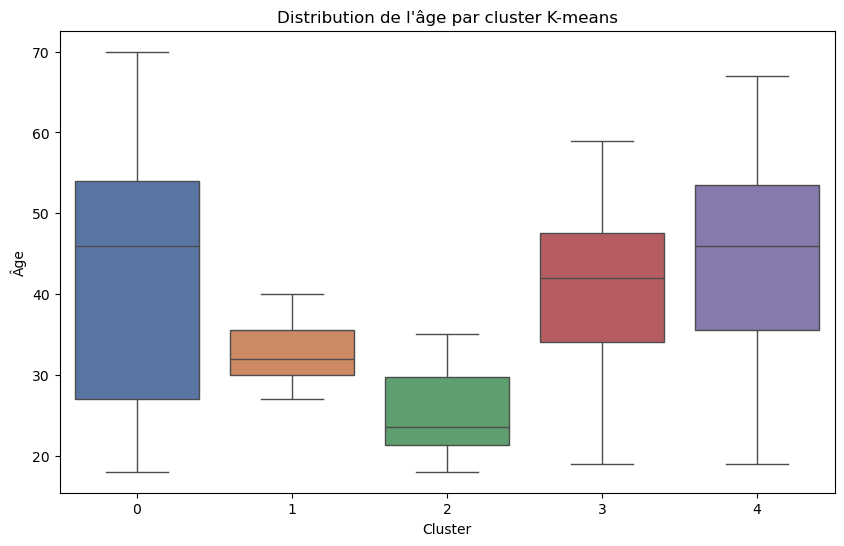

In [73]:
# 7. Boxplot de l'âge par cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kmeans_Cluster', y=age_col, data=results, palette='deep')
plt.title('Distribution de l\'âge par cluster K-means')
plt.xlabel('Cluster')
plt.ylabel('Âge')
plt.savefig('age_by_cluster_with_age.png')
#plt.close()

In [60]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## Verification de la corrélation avec le genre

In [61]:
# Ajouter la colonne Gender aux résultats
# Supposons que les lignes de df et results sont alignées (même ordre)
results['Gender'] = df['Gender']

In [62]:
# Analyser la répartition du genre par cluster
gender_summary = results.groupby(['Kmeans_Cluster', 'Gender']).size().unstack(fill_value=0)
print("\nRépartition du genre par cluster :")
print(gender_summary)


Répartition du genre par cluster :
Gender          Female  Male
Kmeans_Cluster              
0                   48    33
1                   21    18
2                   13     9
3                   16    19
4                   14     9


<Figure size 1000x600 with 0 Axes>

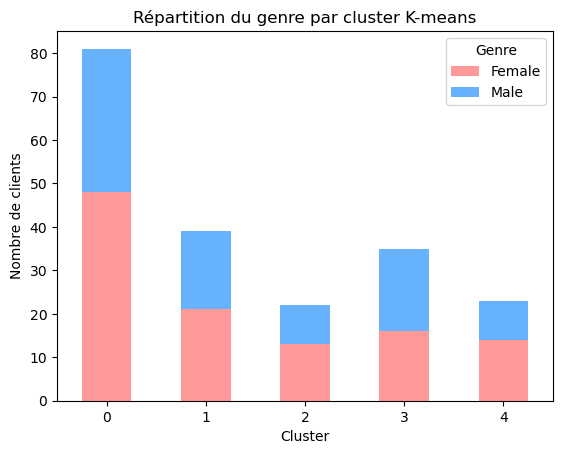

In [63]:
# Visualisation 1 : Barplot de la répartition du genre par cluster
plt.figure(figsize=(10, 6))
gender_summary.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'])
plt.title('Répartition du genre par cluster K-means')
plt.xlabel('Cluster')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=0)
plt.legend(title='Genre', labels=['Female', 'Male'])
plt.savefig('gender_by_cluster_barplot.png')
#plt.close()

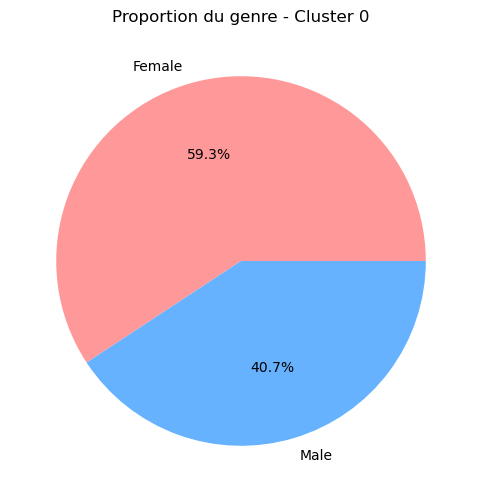

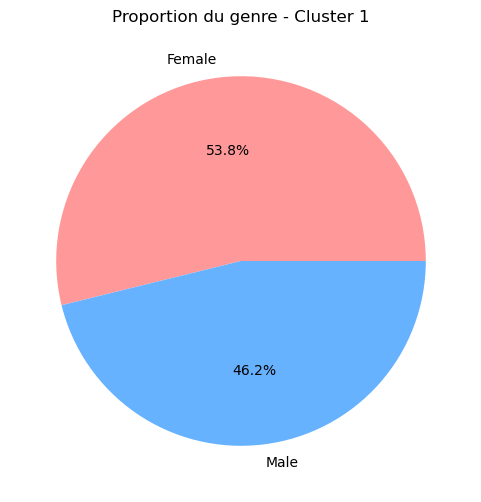

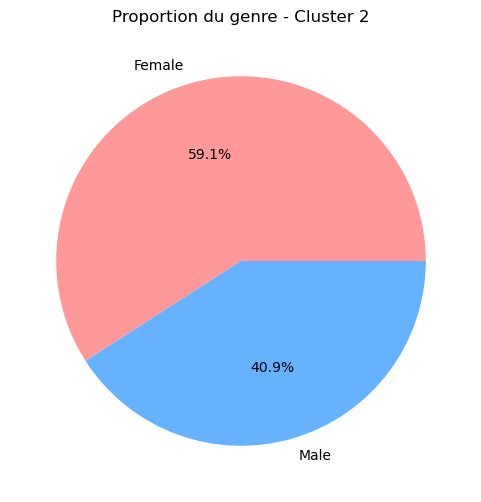

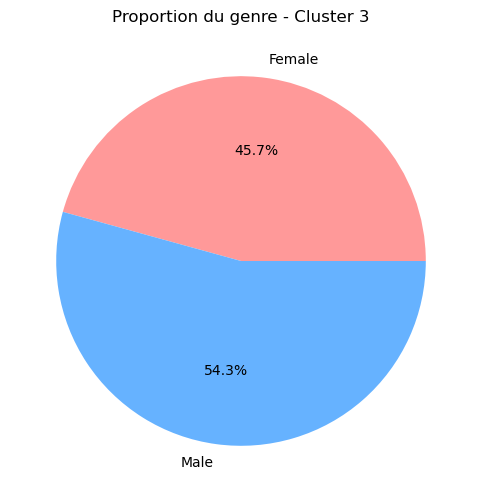

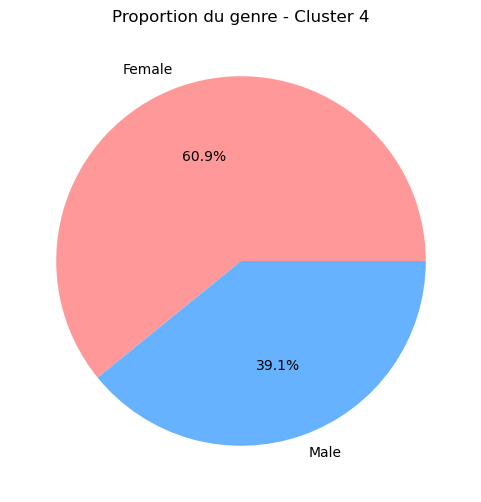

In [65]:
# Visualisation 2 : Proportion du genre par cluster (camembert pour chaque cluster)
for cluster in range(5):
    plt.figure(figsize=(6, 6))
    cluster_data = gender_summary.loc[cluster]
    plt.pie(cluster_data, labels=cluster_data.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF'])
    plt.title(f'Proportion du genre - Cluster {cluster}')
    plt.savefig(f'gender_pie_cluster_{cluster}.png')
    #plt.close()